# COVID-19 Data Discovery

Author: James Lai

Course Project, UC Irvine, Math 10, Summer 2023

## Introduction

For this project, I would like to perform my knowledge for Python coding based on what I had learned from Math 10. With the access to the Covid-19 hospitality data, I would like to make some charts by using Altair and read the data by using Pandas. At the end of the project, I'll also show some extra knowledge I have and the AI(ChatGPT) have.

## Victims of Covid-19

You can either have all one section or divide into multiple sections.  To make new sections, use `##` in a markdown cell.  Double-click this cell for an example of using `##`

## Panda

* Read the csv file! Name it as __df__
* Make __df__ into data without NAN (should be 61762 rows and 9 columns)

In [1]:
import pandas as pd
df = pd.read_csv('covid19hospitalbycounty.csv')
df = df.dropna()

* Make __todays_date__ into the Python format using pd.to_datetime()

In [2]:
df["todays_date"] = pd.to_datetime(df["todays_date"])
df

,county,todays_date,hospitalized_covid_confirmed_patients,hospitalized_suspected_covid_patients,hospitalized_covid_patients,all_hospital_beds,icu_covid_confirmed_patients,icu_suspected_covid_patients,icu_available_beds
1230,Riverside,2020-04-20,247.0,147.0,9.0,164.0,76.0,29.0,134.0
1241,San Diego,2020-04-20,262.0,98.0,46.0,715.0,103.0,19.0,169.0
1270,Shasta,2020-04-20,1.0,0.0,0.0,226.0,1.0,0.0,18.0
1283,Santa Clara,2020-04-21,144.0,34.0,178.0,2582.0,70.0,16.0,120.0
1287,Kings,2020-04-21,8.0,0.0,8.0,223.0,3.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...
63718,Lake,2023-05-10,2.0,0.0,2.0,65.0,1.0,0.0,0.0
63719,Calaveras,2023-05-10,1.0,0.0,1.0,33.0,0.0,0.0,4.0
63720,Sutter,2023-05-10,0.0,0.0,0.0,14.0,0.0,0.0,0.0
63721,Tuolumne,2023-05-10,0.0,0.0,0.0,72.0,0.0,0.0,5.0


* Calculate the average of hospitalized covid confirmed patients in Orange County.(Using Boolean Indexing)

In [3]:
df[df["county"] == "Orange"]["hospitalized_covid_confirmed_patients"].mean()

350.68699551569506

* Create a new column named it as __day__ to show the day name of __todays_date__. (Now should have a new column)

In [4]:
df["day"] = df["todays_date"].dt.day_name()
df

,county,todays_date,hospitalized_covid_confirmed_patients,hospitalized_suspected_covid_patients,hospitalized_covid_patients,all_hospital_beds,icu_covid_confirmed_patients,icu_suspected_covid_patients,icu_available_beds,day
1230,Riverside,2020-04-20,247.0,147.0,9.0,164.0,76.0,29.0,134.0,Monday
1241,San Diego,2020-04-20,262.0,98.0,46.0,715.0,103.0,19.0,169.0,Monday
1270,Shasta,2020-04-20,1.0,0.0,0.0,226.0,1.0,0.0,18.0,Monday
1283,Santa Clara,2020-04-21,144.0,34.0,178.0,2582.0,70.0,16.0,120.0,Tuesday
1287,Kings,2020-04-21,8.0,0.0,8.0,223.0,3.0,0.0,6.0,Tuesday
...,...,...,...,...,...,...,...,...,...,...
63718,Lake,2023-05-10,2.0,0.0,2.0,65.0,1.0,0.0,0.0,Wednesday
63719,Calaveras,2023-05-10,1.0,0.0,1.0,33.0,0.0,0.0,4.0,Wednesday
63720,Sutter,2023-05-10,0.0,0.0,0.0,14.0,0.0,0.0,0.0,Wednesday
63721,Tuolumne,2023-05-10,0.0,0.0,0.0,72.0,0.0,0.0,5.0,Wednesday


* Find the __county__ that has greater confirmed patients than suspected patients.(Using Boolean Index)(Should be 49342 rows)

In [5]:
df["county"][df["hospitalized_covid_confirmed_patients"] > df["hospitalized_suspected_covid_patients"]]

1230       Riverside
1241       San Diego
1270          Shasta
1283     Santa Clara
1287           Kings
            ...     
63715          Kings
63717     San Benito
63718           Lake
63719      Calaveras
63722         Placer
Name: county, Length: 49342, dtype: object

* Show the first 5 rows using the method df.head().

In [6]:
df.head()

,county,todays_date,hospitalized_covid_confirmed_patients,hospitalized_suspected_covid_patients,hospitalized_covid_patients,all_hospital_beds,icu_covid_confirmed_patients,icu_suspected_covid_patients,icu_available_beds,day
1230,Riverside,2020-04-20,247.0,147.0,9.0,164.0,76.0,29.0,134.0,Monday
1241,San Diego,2020-04-20,262.0,98.0,46.0,715.0,103.0,19.0,169.0,Monday
1270,Shasta,2020-04-20,1.0,0.0,0.0,226.0,1.0,0.0,18.0,Monday
1283,Santa Clara,2020-04-21,144.0,34.0,178.0,2582.0,70.0,16.0,120.0,Tuesday
1287,Kings,2020-04-21,8.0,0.0,8.0,223.0,3.0,0.0,6.0,Tuesday


* Using __groupby__ method to check the amount of hospitalized suuspected covid patients by __county__.

In [7]:
df.groupby("county").sum()["hospitalized_suspected_covid_patients"]

county
Alameda             43205.0
Amador                242.0
Butte                 440.0
Calaveras             135.0
Colusa                227.0
Contra Costa        29201.0
Del Norte             111.0
El Dorado             404.0
Fresno              22837.0
Glenn                 147.0
Humboldt             1749.0
Imperial              514.0
Inyo                   66.0
Kern                 4145.0
Kings                 271.0
Lake                  266.0
Lassen                 15.0
Los Angeles        195924.0
Madera               5738.0
Marin                5307.0
Mariposa                1.0
Mendocino             126.0
Merced                708.0
Modoc                  43.0
Mono                    9.0
Monterey              907.0
Napa                  417.0
Nevada                545.0
Orange              28275.0
Placer              19526.0
Plumas                 11.0
Riverside           45938.0
Sacramento          30314.0
San Benito              7.0
San Bernardino      31866.0
San Diego    

## Altair

In [8]:
import altair as alt
import numpy as np

* Due to the oversized data, I created a data named __df2__ to contain only Orange County Data.(1115 rows)

In [9]:
df2 = df[df["county"] == "Orange"]
df2

,county,todays_date,hospitalized_covid_confirmed_patients,hospitalized_suspected_covid_patients,hospitalized_covid_patients,all_hospital_beds,icu_covid_confirmed_patients,icu_suspected_covid_patients,icu_available_beds,day
1293,Orange,2020-04-21,179.0,129.0,308.0,4213.0,77.0,27.0,277.0,Tuesday
1378,Orange,2020-04-22,172.0,111.0,283.0,4786.0,73.0,21.0,293.0,Wednesday
1439,Orange,2020-04-23,170.0,143.0,313.0,5251.0,75.0,25.0,293.0,Thursday
1477,Orange,2020-04-24,175.0,138.0,313.0,5374.0,68.0,24.0,391.0,Friday
1521,Orange,2020-04-25,177.0,133.0,310.0,5370.0,74.0,21.0,394.0,Saturday
...,...,...,...,...,...,...,...,...,...,...
63492,Orange,2023-05-06,74.0,4.0,78.0,5702.0,10.0,1.0,139.0,Saturday
63543,Orange,2023-05-07,74.0,8.0,82.0,5678.0,7.0,2.0,148.0,Sunday
63559,Orange,2023-05-08,81.0,8.0,89.0,5620.0,10.0,1.0,139.0,Monday
63616,Orange,2023-05-09,73.0,7.0,80.0,5924.0,9.0,0.0,130.0,Tuesday


* Use basic code to visualize the __df2__.(Add hospitalized comfirmed patients as X axis)

In [10]:
alt.Chart(df2).mark_circle().encode(
    x = "hospitalized_covid_confirmed_patients"
)

alt.Chart(...)

* Now add icu confirmed patients into y axis.

In [11]:
alt.Chart(df2).mark_circle().encode(
    x = "hospitalized_covid_confirmed_patients",
    y = "icu_covid_confirmed_patients"
)

alt.Chart(...)

* Make the color as "day".

In [12]:
alt.Chart(df2).mark_circle().encode(
    x = "hospitalized_covid_confirmed_patients",
    y = "icu_covid_confirmed_patients",
    color = "day"
)

alt.Chart(...)

* Add some infos for the dots in the chart to make it interactive by using __tooltip__.(Name the chart c1)

In [13]:
c1 = alt.Chart(df2).mark_circle().encode(
    x = "hospitalized_covid_confirmed_patients",
    y = "icu_covid_confirmed_patients",
    color = "day",
    tooltip = ["hospitalized_covid_confirmed_patients","icu_covid_confirmed_patients","day"]
)

c1

alt.Chart(...)

* Visualize it using bar chart.(Name it as c2)

In [14]:
c2 = alt.Chart(df2).mark_bar().encode(
    x = "hospitalized_covid_confirmed_patients",
    y = "icu_covid_confirmed_patients",
    color = "day",
    tooltip = ["hospitalized_covid_confirmed_patients","icu_covid_confirmed_patients","day"]
)

c2

alt.Chart(...)

* Combine circle chart with bar chart. (This might look messy and circle chart will get covered)

In [15]:
c1+c2

alt.LayerChart(...)

* How about separate it?

In [16]:
c1 | c2

alt.HConcatChart(...)

* Now we try other color by using different method!

In [17]:
c1 = alt.Chart(df2).mark_circle().encode(
    x = "hospitalized_covid_confirmed_patients",
    y = "icu_covid_confirmed_patients",
    color = alt.Color("day",scale=alt.Scale(scheme='viridis')),
    tooltip = ["hospitalized_covid_confirmed_patients","icu_covid_confirmed_patients","day"]
)

c1

alt.Chart(...)

## Scikit-Learn

In [18]:
import pandas as pd
import altair as alt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

* Let the linearregression be __clf__.

In [19]:
clf = LinearRegression()
X = df2["hospitalized_covid_confirmed_patients"].values.reshape(-1,1)
y = df2["icu_covid_confirmed_patients"]

* Fit the X and y

In [20]:
clf.fit(X,y)

LinearRegression()

* Check the coefficient by using __coef___ method

In [21]:
clf.coef_

array([0.2427515])

* Check the intercept by using __intercept___

In [22]:
clf.intercept_

-2.076880240495882

* Make prediction of X. Name it as __pred__

In [23]:
df2["pred"] = clf.predict(X)
df2

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,county,todays_date,hospitalized_covid_confirmed_patients,hospitalized_suspected_covid_patients,hospitalized_covid_patients,all_hospital_beds,icu_covid_confirmed_patients,icu_suspected_covid_patients,icu_available_beds,day,pred
1293,Orange,2020-04-21,179.0,129.0,308.0,4213.0,77.0,27.0,277.0,Tuesday,41.375639
1378,Orange,2020-04-22,172.0,111.0,283.0,4786.0,73.0,21.0,293.0,Wednesday,39.676378
1439,Orange,2020-04-23,170.0,143.0,313.0,5251.0,75.0,25.0,293.0,Thursday,39.190875
1477,Orange,2020-04-24,175.0,138.0,313.0,5374.0,68.0,24.0,391.0,Friday,40.404633
1521,Orange,2020-04-25,177.0,133.0,310.0,5370.0,74.0,21.0,394.0,Saturday,40.890136
...,...,...,...,...,...,...,...,...,...,...,...
63492,Orange,2023-05-06,74.0,4.0,78.0,5702.0,10.0,1.0,139.0,Saturday,15.886731
63543,Orange,2023-05-07,74.0,8.0,82.0,5678.0,7.0,2.0,148.0,Sunday,15.886731
63559,Orange,2023-05-08,81.0,8.0,89.0,5620.0,10.0,1.0,139.0,Monday,17.585991
63616,Orange,2023-05-09,73.0,7.0,80.0,5924.0,9.0,0.0,130.0,Tuesday,15.643979


* Visualize the prediction with original data.

In [24]:
c3 = alt.Chart(df2).mark_circle(size=10).encode(
    x="hospitalized_covid_confirmed_patients",
    y="icu_covid_confirmed_patients"
)
c4 = alt.Chart(df2).mark_line(color="green").encode(
    x="hospitalized_covid_confirmed_patients",
    y="pred"
)
c3+c4

alt.LayerChart(...)

* Checking error using __mean_squared_error__.

In [25]:
from sklearn.metrics import mean_squared_error
mean_squared_error(df2["icu_covid_confirmed_patients"],df2["pred"])
# the smaller the better. LinearRegression will choose the least error one.

854.480535952418

* Split the X and y into X_train,X_test,y_train,y_test.

In [26]:
from sklearn.model_selection import train_test_split
X = df2["hospitalized_covid_confirmed_patients"].values.reshape(-1,1)
y = df2["icu_covid_confirmed_patients"].values.reshape(-1,1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [27]:
clf.fit(X_train,y_train)

LinearRegression()

* Check the accuracy!

In [28]:
clf.score(X_train,y_train)

0.9208949079832214

In [29]:
clf.score(X_test,y_test)

0.9129212991512897

* Check the coefficient again!

In [30]:
clf.coef_

array([[0.24132961]])

## Extra Interesting Tools

### Other Libraries

In [31]:
import numpy as np
import statsmodels.api as sm

In [32]:
X = sm.add_constant(df["hospitalized_covid_confirmed_patients"])
y = sm.OLS(df["icu_covid_confirmed_patients"], X).fit()
y.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     icu_covid_confirmed_patients   R-squared:                       0.944
Model:                                      OLS   Adj. R-squared:                  0.944
Method:                           Least Squares   F-statistic:                 1.034e+06
Date:                          Wed, 27 Sep 2023   Prob (F-statistic):               0.00
Time:                                  20:16:14   Log-Likelihood:            -2.5873e+05
No. Observations:                         61762   AIC:                         5.175e+05
Df Residuals:                             61760   BIC:                         5.175e+05
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.2258      0.067     -3.389      0.001      -0.356      -0.095
hospitalized_covid_confirmed_patients     0.2226      0.000   1016.640      0.000       0.222       0.223
==============================================================================
Omnibus:                    30388.010   Durbin-Watson:                   1.760
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         31059312.883
Skew:                          -0.868   Prob(JB):                         0.00
Kurtosis:                     112.847   Cond. No.                         316.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### ChatGPT

* The code below is completely from ChatGPT. I told it to generate the data by itself.

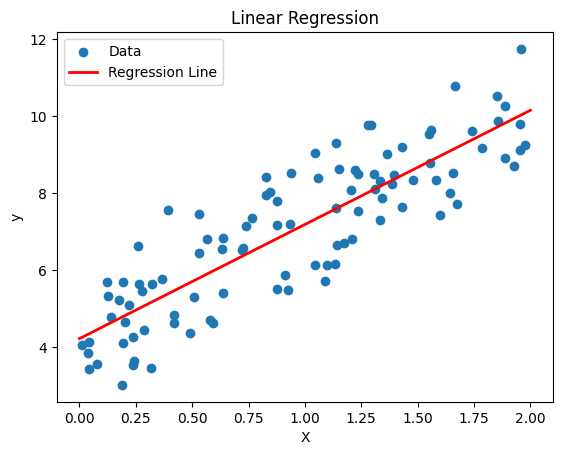

Intercept: 4.222151077447231
Coefficient: 2.968467510701019


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)  # Generate random values for the independent variable
y = 4 + 3 * X + np.random.randn(100, 1)  # Generate noisy dependent variable

# Create a DataFrame
df = pd.DataFrame({'X': X.flatten(), 'y': y.flatten()})

# Fit a linear regression model
regression_model = LinearRegression()
regression_model.fit(X, y)

# Make predictions
X_new = np.array([[0], [2]])
y_pred = regression_model.predict(X_new)

# Plot the data and regression line
plt.scatter(X, y, label='Data')
plt.plot(X_new, y_pred, 'r-', label='Regression Line', linewidth=2)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()

# Print model parameters
print(f'Intercept: {regression_model.intercept_[0]}')
print(f'Coefficient: {regression_model.coef_[0][0]}')

* The code below is that I'm telling ChatGPT to use SciPy to code for me.

In [34]:
import numpy as np
from scipy.linalg import solve

# Define the coefficients matrix A and the right-hand side vector b
A = np.array([[3, 1], [1, 2]])
b = np.array([9, 8])

# Solve the system of linear equations Ax = b
x = solve(A, b)

# Print the solution
print("Solution x:", x)

Solution x: [2. 3.]


## Summary

Either summarize what you did, or summarize the results.  Maybe 3 sentences.

In Pandas section, I used the code to read the file and found some intersting data such as the average of the confirmed patients. Moreover, I also used some advanced code to check the total of the patients by county. 
In Altair section, because the file itself is too big, so I made a subDataframe that contains the data of Orange County only to make the data smaller so that I can use Altair to perform the Chart.
In Extra Topic section, I used StatisticModel to show different use of libraries. I also used ChatGPT to let it code by itself to show how awesome is the AI tech right now.

## References

Your code above should include references.  Here is some additional space for references.

* What is the source of your dataset(s)?

https://data.ca.gov/dataset/covid-19-hospital-data
The source is from California Government.

* List any other references that you found helpful.

https://www.statsmodels.org/stable/index.html
Seabold, Skipper, and Josef Perktold. “statsmodels: Econometric and statistical modeling with python.” Proceedings of the 9th Python in Science Conference. 2010.
https://chat.openai.com/
https://ybaki97.github.io/Math10-SSII23/intro.html


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fe71b3b2-0f78-4707-a572-a30062c67bb1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>